In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

In [2]:
class LogisticRegression(object):
    def set_weight_vector(self,w):
        self.w=w
    def linear_combination(self,X:np.ndarray)->np.ndarray:
        return X@self.w
    def sigmoid(self,z:np.ndarray):
        return 1/(1+np.exp(-z))
    def activation(self,X:np.ndarray)->np.ndarray:
        return self.sigmoid(self.linear_combination(X))
    def predict(self,x:np.ndarray,threshold:float=0.5):
        return np.where(self.activation(x)>threshold,1,0).astype(int)
    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
        predicted_prob=self.activation(X)
        return -1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob)))+reg_rate*np.dot(self.w.T,self.w)
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
        return X.T@(self.activation(X)-y)+reg_rate*self.w
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
        return self.w-lr*grad
    def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float,reg_rate:float)->np.ndarray:
        self.w=np.zeros(X.shape[1])
        self.w_all=[]
        self.err_all=[]
        for i in range(0,num_epochs):
            dJdW=self.calculate_gradient(X,y,reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y,reg_rate))
            self.w=self.update_weights(dJdW,lr)
        return self.w

In [3]:
def create_toy_data():
    x0=np.random.normal(size=50).reshape(-1,2)-1
    x1=np.random.normal(size=50).reshape(-1,2)+1.
    return np.concatenate([x0,x1]),np.concatenate([np.zeros(25),np.ones(25)]).astype(int)
X,y=create_toy_data()
X.shape,y.shape

((50, 2), (50,))

In [4]:
import itertools
import functools

def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)

def compute_new_feature(items):
    return functools.reduce(lambda x,y:x*y,items)

def polynomial_transform(x,degree,logging=False):
    if x.ndim==1:
        x=x[:,None]
    x_t=x.transpose()
    features=[np.ones(len(x))]
    if logging:
        print("Input : ",x)
    for degree in range(1,degree+1):
        for items in get_combinations(x_t,degree):
            features.append(compute_new_feature(items))
            if logging:
                print(items," : ",compute_new_feature(items))
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()

In [5]:
X_dummy=polynomial_transform(X,degree=1)
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37, 3), (13, 3), (37,), (13,))

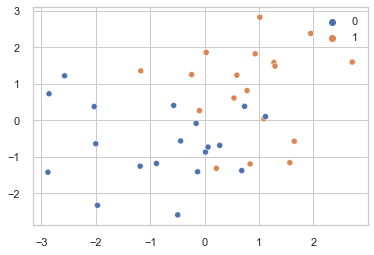

In [6]:
def visualize_training_data(X_train,y_train):
    sns.set(style='whitegrid')
    sns.scatterplot(data=X_train,x=X_train[:,1],y=X_train[:,2],hue=y_train)
visualize_training_data(X_train,y_train)

In [7]:
log_reg=LogisticRegression()
log_reg.gd(X_train,y_train,num_epochs=1000,reg_rate=0,lr=1e-2)

array([-0.20806705,  1.66928381,  1.42044046])

In [28]:
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)),err,'r-')

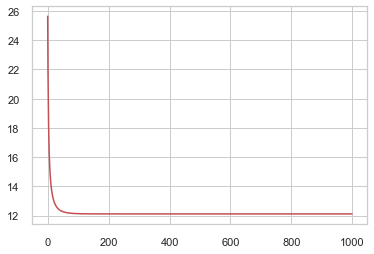

In [29]:
plot_learning_curve(log_reg.err_all)

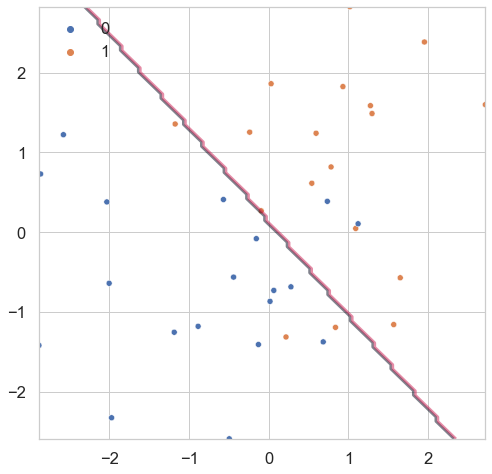

In [10]:
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
def visualize_model(x_train,labels,lsc_obj,degree=1):
    f=plt.figure(figsize=(8,8))
    
    # compute xlim and ylim
    x1_min=np.min(x_train[:,1])
    x1_max=np.max(x_train[:,1])
    x2_min=np.min(x_train[:,2])
    x2_max=np.max(x_train[:,2])

    x1_test,x2_test=np.meshgrid(np.linspace(x1_min,x1_max,100),np.linspace(x2_min,x2_max,100))
    x_test=np.array([x1_test,x2_test]).reshape(2,-1).T
    x_test_poly=polynomial_transform(x_test,degree=degree)
    y_test=lsc_obj.predict(x_test_poly)

    sns.scatterplot(data=x_train,x=x_train[:,1],y=x_train[:,2],hue=labels)
    plt.contour(x1_test,x2_test,y_test.reshape(100,100),alpha=0.5,levels=np.linspace(0,1,3))
    plt.xlim=(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.gca().set_aspect('equal',adjustable='box')
    plt.show()
visualize_model(X_train,y_train,log_reg,degree=1)

In [11]:
from sklearn.metrics import classification_report
y_test_hat=log_reg.predict(X_test)
print(classification_report(y_test,y_test_hat,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [12]:
from sklearn.datasets import make_circles
X,y=make_circles()

In [13]:
X_dummy=polynomial_transform(X,degree=2)
X_train, X_test, y_train, y_test = train_test_split(X_dummy,y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((75, 6), (25, 6), (75,), (25,))

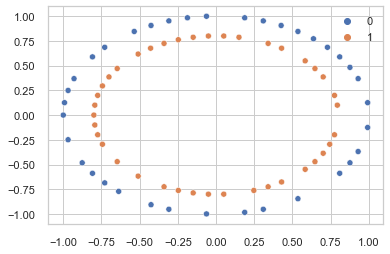

In [14]:
visualize_training_data(X_train,y_train)

In [31]:
log_reg_poly=LogisticRegression()
log_reg_poly.gd(X_train,y_train,num_epochs=10000,reg_rate=0,lr=1e-2)

array([ 2.03342796e+01, -1.72389868e-02, -8.33750072e-02, -2.48142943e+01,
       -3.03629997e-01, -2.48088175e+01])

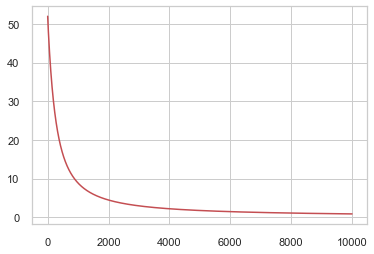

In [32]:
plot_learning_curve(log_reg_poly.err_all)

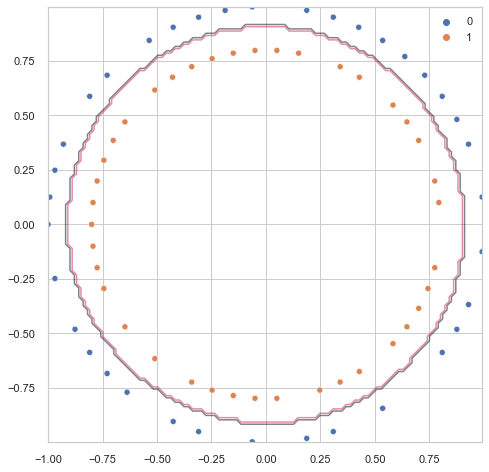

In [34]:
visualize_model(X_train,y_train,log_reg_poly,degree=2)

In [35]:
y_test_hat=log_reg_poly.predict(X_test)
print(classification_report(y_test,y_test_hat,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

